In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
print('Setup Done!')

Setup Done!


In [2]:
# Step 1: Data Collection
# Load the Titanic dataset from a CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [3]:
# Step 2: Data Exploration
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Step 2: Data Exploration
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Step 3: Data Preprocessing
# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values for 'Age' with the median and 'Embarked' with the mode
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Convert categorical columns to numerical
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature Engineering: Create a new feature 'FamilySize'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Split the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Step 4: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest and Gradient Boosting)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Grid search for hyperparameter tuning (optional)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END 

In [7]:
# Step 5: Model Evaluation
# Predict on the test set using both models
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

# Evaluate the models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion matrices
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Final model selection (if you want to choose one based on the evaluation metrics)
final_model = best_gb if accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred_rf) else best_rf

Random Forest Accuracy: 0.7988826815642458
Gradient Boosting Accuracy: 0.8324022346368715

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179


Random Forest Confusion Matrix:
 [[93 12]
 [24 50]]

Gradient Boosting Confusion Matrix:
 [[97  8]
 [22 52]]


In [8]:
# Step 6: Final Prediction
# Use the final model to make predictions on new data (test set or any new data)
final_predictions = final_model.predict(X_test)
print("Final Prediction Accuracy:", accuracy_score(y_test, final_predictions))

Final Prediction Accuracy: 0.8324022346368715


In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [10]:
# Analyze Feature Importance
# Extract feature importance
importances = final_model.feature_importances_
feature_names = data.drop('Survived', axis=1).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

      Feature  Importance
1         Sex    0.442180
5        Fare    0.189191
0      Pclass    0.151386
2         Age    0.126015
7  FamilySize    0.042553
3       SibSp    0.030417
6    Embarked    0.014704
4       Parch    0.003555


# Understanding Feature Importance Values
###	•	Sex (0.442180):
#### This means that gender was the most important feature in predicting survival. The high importance score suggests that whether a passenger was male or female had a significant impact on their likelihood of survival.
###	•	Fare (0.189191):
#### This indicates that the fare a passenger paid, which often correlates with social status and wealth, was the second most important factor. Passengers who paid higher fares (likely in first class) had a better chance of survival.
###	•	Pclass (0.151386):
#### This feature, which represents the passenger’s class (1st, 2nd, or 3rd), is also important. Higher-class passengers generally had more access to lifeboats, contributing to a higher survival rate.
###	•	Age (0.126015):
#### Age was the least important of these top features, but it still played a role. Younger passengers might have been more likely to survive, perhaps due to prioritization during evacuation.

# Why were Sex and Pclass emphasized?
###	•	High Impact:
#### Although Fare and Age are also important, Sex had the highest importance score, indicating it was the most influential feature.
###	•	Simplicity in Interpretation:
#### Sex and Pclass are easier to interpret directly:
####	-	Sex: Survival rates can be directly compared between males and females.
####	-	Pclass: Social status is clearly linked to the class a passenger was in, and this directly correlates to survival chances.
###	•	Correlation with Other Features:
#### Fare and Pclass are somewhat correlated; higher fares are often associated with higher classes. While Fare is important, its impact may overlap with Pclass, making Pclass a more straightforward feature to discuss in the conclusion.

In [11]:
# Segment Analysis
# Add the prediction results to the original data
data['Predicted_Survived'] = final_model.predict(X)

# Group by different features to analyze survival rates
survival_by_gender = data.groupby('Sex')['Predicted_Survived'].mean()
survival_by_class = data.groupby('Pclass')['Predicted_Survived'].mean()
survival_by_family_size = data.groupby('FamilySize')['Predicted_Survived'].mean()

print("Survival by Gender:\n", survival_by_gender)
print("Survival by Class:\n", survival_by_class)
print("Survival by Family Size:\n", survival_by_family_size)

Survival by Gender:
 Sex
0    0.751592
1    0.065858
Name: Predicted_Survived, dtype: float64
Survival by Class:
 Pclass
1    0.509259
2    0.461957
3    0.160896
Name: Predicted_Survived, dtype: float64
Survival by Family Size:
 FamilySize
1     0.208566
2     0.478261
3     0.558824
4     0.724138
5     0.200000
6     0.136364
7     0.083333
8     0.000000
11    0.000000
Name: Predicted_Survived, dtype: float64


# Potential Findings
### Importance of Family Size
#### If Family Size has a lower importance score compared to Sex, Fare, Pclass, and Age, it suggests that while it contributes to the model’s predictions, it’s less influential. However, it still provides valuable information.
### Interpreting Family Size
###	•	Small to Medium Family Size (2-4 members):
#### If passengers in this range had higher survival rates, it suggests that traveling with a few family members was advantageous.
#### Smaller families, or individuals traveling alone, might have had more flexibility during evacuation, potentially improving their chances of survival.
###	•	Large Family Size (>4 members):
#### If larger families had lower survival rates, it could indicate that larger groups had more difficulty staying together or accessing lifeboats.
#### Passengers with larger families might have had a different survival dynamic. They might have stayed together during the evacuation, which could either help or hinder their chances depending on the circumstances (e.g., availability of lifeboats).


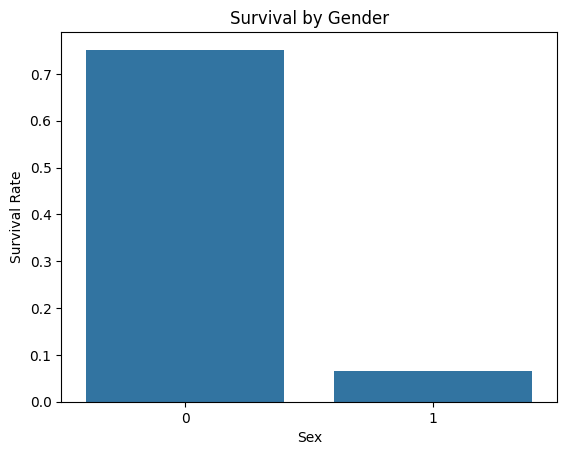

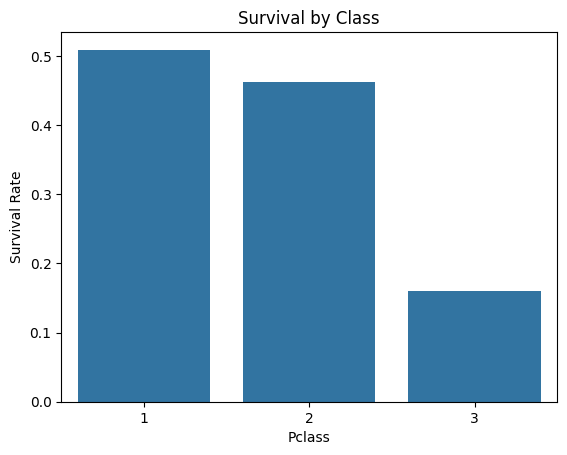

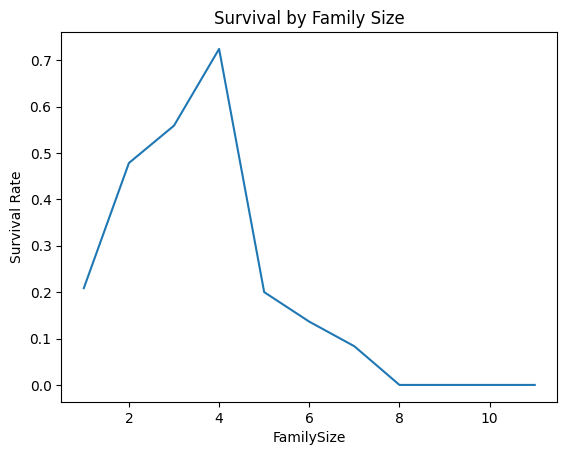

In [12]:
# Visualizing the Results
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by Gender
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title("Survival by Gender")
plt.ylabel("Survival Rate")
plt.show()

# Survival by Class
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title("Survival by Class")
plt.ylabel("Survival Rate")
plt.show()

# Survival by Family Size
sns.lineplot(x=survival_by_family_size.index, y=survival_by_family_size.values)
plt.title("Survival by Family Size")
plt.ylabel("Survival Rate")
plt.show()

# Draw a Conclusion based on Importance Features
### 1. From the analysis, gender and class were the most significant predictors of survival, with females and first-class passengers having significantly higher survival rates.
### 2. Additionally, passengers who paid higher fares, often corresponding to first-class tickets, had better chances of survival, indicating that wealth played a crucial role.
### 3. Age also influenced survival, with younger passengers slightly more likely to survive.
### 4. Furthermore, family size played a role, with small to medium-sized families having a better chance of survival compared to those traveling alone or in very large groups. This suggests that while traveling with family could be advantageous, larger family groups might have faced more challenges during the evacuation.